# Livecode 3

Kamu adalah seorang data scientist di salah satu perusahaan e-commerce. Saat ini, kamu terlibat dalam proyek bersama dengan tim produk dan tim UI/UX untuk merubah tampilan landing page. Menggunakan dataset dari https://raw.githubusercontent.com/fahmimnalfrzki/Dataset/main/purchase_data.txt?token=AEZDEHRU5YLQEXGDDLCL6CLA2KZTI, menggunakan konsep central of tendency, apakah data cenderung berpusat pada purchased=0 atau purchased=1? dan buatlah analisa menggunakan konsep hypothesis testing dan A/B testing (Informasikan H0 dan H1 pada bagian Mathematical Calculation and Analysis). Apa kesimpulanmu terhadap hasil A/B testing?

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [ ]:
# loading data
df = pd.read_csv('https://raw.githubusercontent.com/fahmimnalfrzki/Dataset/main/purchase_data.txt?token=AEZDEHRU5YLQEXGDDLCL6CLA2KZTI', sep=';')
df.head()

,user_id,timestamp,group,landing_page,purchased
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [ ]:
df.shape

(294478, 5)

In [ ]:
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
purchased       0
dtype: int64

## Quest 1

menggunakan konsep central of tendency, apakah data cenderung berpusat pada purchased=0 atau purchased=1?

In [ ]:
df.head()

,user_id,timestamp,group,landing_page,purchased
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [ ]:
new_page = df[df['landing_page']=='new_page']['purchased']
new_page.head()

2    0
3    0
6    1
8    1
9    1
Name: purchased, dtype: int64

In [ ]:
old_page = df[df['landing_page']=='old_page']['purchased']
old_page.head()

0    0
1    0
4    1
5    0
7    0
Name: purchased, dtype: int64

In [ ]:
# cek central tendency
new_page.describe()

count    147239.000000
mean          0.118841
std           0.323602
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: purchased, dtype: float64

In [ ]:
new_page.value_counts()

0    129741
1     17498
Name: purchased, dtype: int64

Central tendency new page:
- mean  : 0.118
- median: 0.00
- std   : 0.323
- modus : 0 dengan 129741 kemunculan

In [ ]:
old_page.describe()

count    147239.000000
mean          0.120478
std           0.325520
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: purchased, dtype: float64

In [ ]:
old_page.value_counts()

0    129500
1     17739
Name: purchased, dtype: int64

central tendency old_page:
- mean   : 0.120
- median : 0.00
- std    : 0.325
- modus  : 0 dengan 129500 kemunculan

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


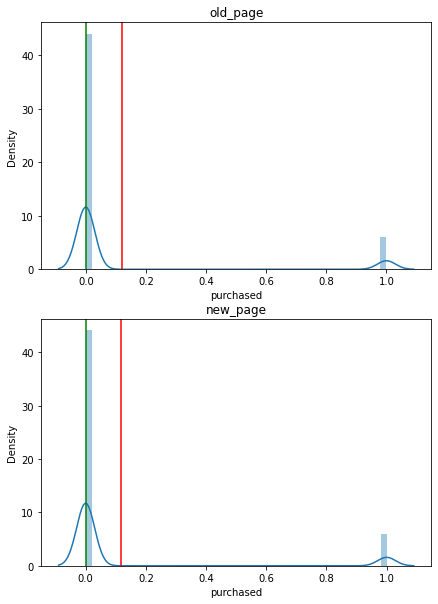

In [ ]:
fig, ax = plt.subplots(nrows=2, figsize=[7,10])

sns.distplot(old_page, ax=ax[0])
ax[0].set_title('old_page')
ax[0].axvline(old_page.mean(), color='red')
ax[0].axvline(old_page.median(), color='green')

sns.distplot(new_page, ax=ax[1])
ax[1].set_title('new_page')
ax[1].axvline(new_page.mean(), color='red')
ax[1].axvline(new_page.median(), color='green')

plt.show()

Data skewed ke kanan, dengan nilai rata-rata lebih besar dari median.

## Quest 2

buatlah analisa menggunakan konsep hypothesis testing dan A/B testing (Informasikan H0 dan H1 pada bagian Mathematical Calculation and Analysis). Apa kesimpulanmu terhadap hasil A/B testing?

## Paired T-Test 2 Sample 2 Tailed

- H0: Tidak ada perbedaan signifikan antara old page dengan new page; μ old page = μ new page
- H1: Terdapat perbedaan signifikan antara old pagen dengan new page; μ old page != μ new page

In [ ]:
t_stat,p_val = stats.ttest_rel(old_page.sample(5000, random_state=42), new_page.sample(5000, random_state=42))
print('p value: ', p_val)

p value:  0.8315792454633069


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


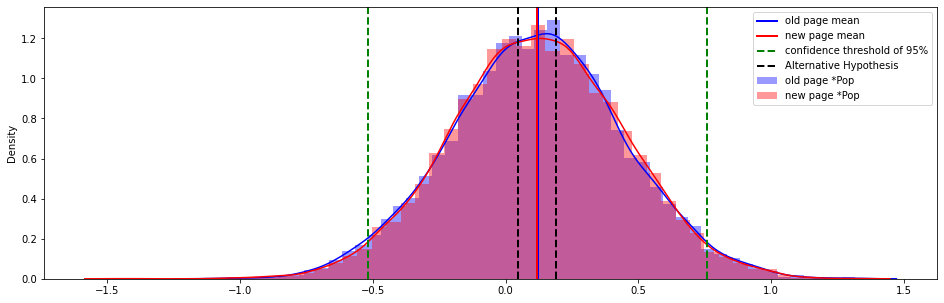

In [ ]:
old_page_pop = np.random.normal(old_page.mean(), old_page.std(),10000)
new_page_pop = np.random.normal(new_page.mean(), new_page.std(),10000)

ci = stats.norm.interval(0.95, old_page.mean(), old_page.std())
plt.figure(figsize=(16,5))
sns.distplot(old_page_pop, label='old page *Pop',color='blue')
sns.distplot(new_page_pop, label='new page *Pop',color='red')

plt.axvline(old_page.mean(), color='blue', linewidth=2, label='old page mean')
plt.axvline(new_page.mean(), color='red',  linewidth=2, label='new page mean')

plt.axvline(ci[1], color='green', linestyle='dashed', linewidth=2, label='confidence threshold of 95%')
plt.axvline(ci[0], color='green', linestyle='dashed', linewidth=2)

plt.axvline(old_page_pop.mean()+t_stat*old_page_pop.std(), color='black', linestyle='dashed', linewidth=2, label = 'Alternative Hypothesis')
plt.axvline(new_page_pop.mean()-t_stat*new_page_pop.std(), color='black', linestyle='dashed', linewidth=2)

plt.legend()

Hasil pengujian statistik menggunakan Paired T-test 2 sample 2 tailed dengan Confidence Interval sebesar 95% menghasilkan p-value bernilai  0.8315. Nilai p-value lebih besar dari alpha mengindikasikan gagal menolak H0. Hal ini mengartikan tidak terdapat perbedaan convertion purchased antara loading page baru ataupun lama.

- nyiapin data, slicing (variabel new page-old page)
- cek central tendency dari masing-masing variabel
- hypotesis testing. (tentukan jenis tes - buat logical expression - buat mathematical - test inference - pengambilan kesimpulan)

## T - Test 2 sample 1 tailed

- mean old_page : 0.120
- mean new_page : 0.118

- H0: Tidak terdapat perbedaaan antara rata-rata old page dengan new page; **μ old page <= μ new page**
- H1: Terdapat perbedaan antara rata-rata old page dengan new page; **μ old page > μ new page**

In [ ]:
t_stat, p_val = stats.ttest_ind(old_page.sample(1000), new_page.sample(1000))
print('p-value 2 tailed: ', p_val)
print('p-value 1 tailed: ', p_val/2)

p-value 2 tailed:  0.2745585135683235
p-value 1 tailed:  0.13727925678416175


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


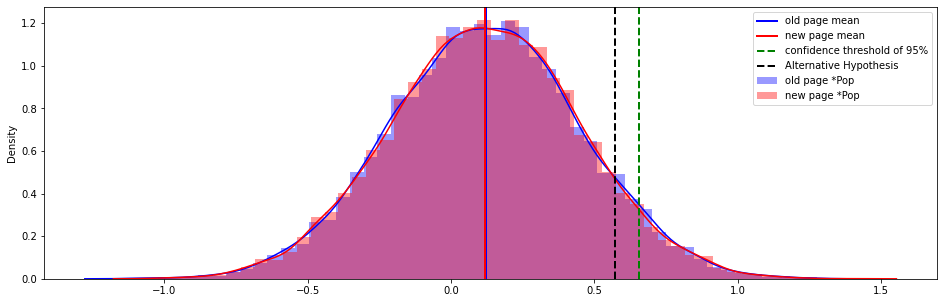

In [ ]:
old_page_pop = np.random.normal(old_page.mean(), old_page.std(),10000)
new_page_pop = np.random.normal(new_page.mean(), new_page.std(),10000)

ci = stats.norm.interval(0.90, old_page.mean(), old_page.std())
plt.figure(figsize=(16,5))
sns.distplot(old_page_pop, label='old page *Pop',color='blue')
sns.distplot(new_page_pop, label='new page *Pop',color='red')

plt.axvline(old_page.mean(), color='blue', linewidth=2, label='old page mean')
plt.axvline(new_page.mean(), color='red',  linewidth=2, label='new page mean')

plt.axvline(ci[1], color='green', linestyle='dashed', linewidth=2, label='confidence threshold of 95%')
# plt.axvline(ci[0], color='green', linestyle='dashed', linewidth=2)

plt.axvline(old_page_pop.mean()+t_stat*old_page_pop.std(), color='black', linestyle='dashed', linewidth=2, label = 'Alternative Hypothesis')
# plt.axvline(new_page_pop.mean()-t_stat*new_page_pop.std(), color='black', linestyle='dashed', linewidth=2)

plt.legend()